[-1 -1 -1 -1 -1 -1 -1 -1 11 -1 -1 -1 -1 -1 -1 -1  4 -1  4 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1  4 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 11 11  8  5 -1 -1  2 -1 -1 11  5  5 -1 -1 -1 11  4 -1 -1 -1 -1
 -1 -1 -1 -1 -1 11 -1  9 -1 -1  5  5 -1 -1 -1 -1 -1 -1  4 -1  4 -1 -1 -1
  0 -1 -1 -1  0  4 -1  0  0 -1  0  0 -1  0 -1  4  0  4  0  0 -1 -1  0 -1
  0  0  0  0 -1 -1 -1  0  0 -1  0  0 10  0  0 -1 -1  0 -1  0 -1  0 -1 -1
  0  0 -1 -1 11  0  0 -1 -1  0  0 -1  2  0 10 10 -1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1  1  1 -1 10  1  1  1  1  1  1  1  1  1 -1 -1  1  0  5  1  1
  1  1  2 -1 10 10 10 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 11 -1
 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  3 -1  5 -1  3
  3 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 10 -1 -1 -1
 -1 -1  3 -1 -1 11 -1 -1 11 -1 -1  2 -1 -1 -1 -1 -1

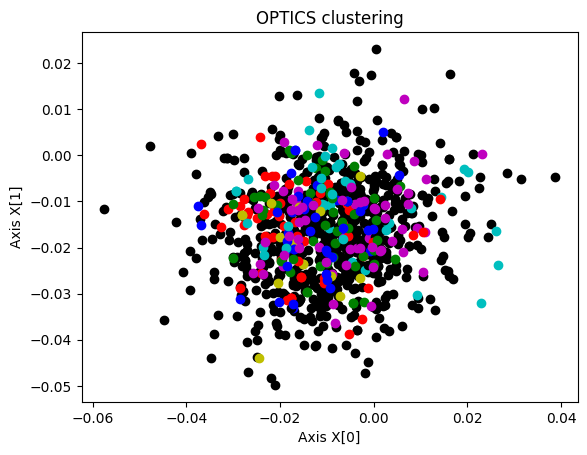

In [21]:
from sklearn.cluster import OPTICS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def convet_to_float_array(input: str) -> np.array:
    values_str = input.strip('[]')
    values_list = values_str.split(',')
    # 将字符串列表转换为浮点数数组
    float_array = np.array([float(value) for value in values_list])
    return float_array

# 读取title embedding
title_embedding = np.array(pd.read_csv("../data/sample_data_title_embedding.csv", encoding='utf-8')["title_embedding"].apply(lambda x: convet_to_float_array(x)).tolist())

from sklearn.metrics.pairwise import pairwise_distances
# 计算相似度矩阵
similarity_matrix = 1 - pairwise_distances(title_embedding, metric='cosine')


from sklearn.cluster import OPTICS

# 创建OPTICS对象并拟合相似度矩阵
optics = OPTICS(min_samples=15, xi=0.005, min_cluster_size=15)
clusters = optics.fit_predict(similarity_matrix)

print(clusters)


import matplotlib.pyplot as plt

# 将聚类结果可视化
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster_id in np.unique(clusters):
    if cluster_id == -1:
        # 如果是噪声点，则用黑色表示
        color = 'k'
    else:
        # 否则，使用预定义的颜色
        color = colors[cluster_id % len(colors)]
    # 获取属于该聚类簇的样本的索引
    cluster_indices = np.where(clusters == cluster_id)[0]
    # 绘制该聚类簇的样本
    plt.scatter(title_embedding[cluster_indices, 0], title_embedding[cluster_indices, 1], c=color, marker='o')
plt.title('OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [2]:
# 对cluster进行分类，以元素值为key，index List作为value的字典
index_cluster_map = {}
for i, cluster_id in enumerate(clusters):
    # -1的元素作为噪声点，丢弃
    if cluster_id != -1:
        if cluster_id not in index_cluster_map:
            index_cluster_map[cluster_id] = []
        index_cluster_map[cluster_id].append(i)

print(index_cluster_map)

{1: [53, 88, 285, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 382, 383, 384, 437, 438, 454, 494, 495, 542, 544, 545, 546, 547, 548, 549, 550, 551, 650, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 781, 784, 785, 786, 787, 788, 791, 792, 794, 795, 796, 797, 798, 802, 803, 804, 812, 814, 815, 817, 818, 819, 822, 826, 829, 830, 831, 832, 833, 836, 837, 838], 0: [96, 100, 103, 104, 106, 107, 109, 112, 114, 115, 118, 120, 121, 122, 123, 127, 128, 130, 131, 133, 134, 137, 139, 141, 144, 145, 149, 150, 153, 154, 157], 3: [132, 158, 159, 175, 198, 308, 661, 686, 700, 714, 729, 731, 733, 741, 744, 801, 808, 811, 824, 828], 2: [595, 622, 655, 695, 699, 702, 724, 800, 805, 806, 807, 809, 816, 823, 825]}


In [3]:
source_title_df = pd.read_csv("../data/sample_data_title_embedding.csv")
# 根据cluster_map 里面内容，转化为对应event title的map
title_cluster_map = {}

import pandas as pd

# 将索引列表转换为标题列表
for cluster_id, index_list in index_cluster_map.items():
    title_list = source_title_df.iloc[index_list]['title'].tolist()
    title_cluster_map[cluster_id] = title_list

print(title_cluster_map)

{1: ['Itochu Techno Solutions 1Q Net Y6.37B Vs Net Y4.30B', 'Nanya Technology 2Q Net Loss NT$770.9M Vs Net Profit NT$6.57B', 'Escorts Kubota Records Sharp Rise in Fiscal Q1 Consolidated Net Profit', 'Tokyo Electric Power 1Q Rev Y1.62T Vs Y1.53T', 'Tokyo Electric Power 1Q Net Y136.29B Vs Loss Y48.17B', 'Aozora Bank 1Q Net Y6.77B Vs Net Y8.37B', 'Aozora Bank Sees FY Net Y24.00B', 'Sanyu Co Ltd 1Q Net Y178.00M Vs Net Y137.00M', 'Kawamoto Corp 1Q Net Y42.00M Vs Net Y76.00M', 'Sanrio Co 1Q Net Y4.92B Vs Net Y785.00M', 'Iriso Electronics Sees 1H Net Y2.70B', 'Aozora Bank 1Q Rev Y66.80B Vs Y50.83B', 'Aozora Bank 1Q Rev Y66.80B Vs Y50.83B', 'Sanritsu Corp 1Q Net Y151.00M Vs Net Y185.00M', 'Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B', 'Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B', 'Korean Air Lines Co. Ltd. 2Q Standalone Op Pft KRW467.98B Vs Op KRW735.87B', 'Korean Air Lines Co. Ltd. 2Q Standalone Net KRW371.48B Vs KRW450.41B', 'Korean Air Lines Co. Ltd. 2Q Standalo

In [4]:
title_list_str_map = {}
# 将标题列表拼接成一个字符串
for cluster_id, title_list in title_cluster_map.items():
    title_str = '\n'.join([f'{i+1}. {title}' for i, title in enumerate(title_list)])
    title_list_str_map[cluster_id] = title_str

print(title_list_str_map)

{1: '1. Itochu Techno Solutions 1Q Net Y6.37B Vs Net Y4.30B\n2. Nanya Technology 2Q Net Loss NT$770.9M Vs Net Profit NT$6.57B\n3. Escorts Kubota Records Sharp Rise in Fiscal Q1 Consolidated Net Profit\n4. Tokyo Electric Power 1Q Rev Y1.62T Vs Y1.53T\n5. Tokyo Electric Power 1Q Net Y136.29B Vs Loss Y48.17B\n6. Aozora Bank 1Q Net Y6.77B Vs Net Y8.37B\n7. Aozora Bank Sees FY Net Y24.00B\n8. Sanyu Co Ltd 1Q Net Y178.00M Vs Net Y137.00M\n9. Kawamoto Corp 1Q Net Y42.00M Vs Net Y76.00M\n10. Sanrio Co 1Q Net Y4.92B Vs Net Y785.00M\n11. Iriso Electronics Sees 1H Net Y2.70B\n12. Aozora Bank 1Q Rev Y66.80B Vs Y50.83B\n13. Aozora Bank 1Q Rev Y66.80B Vs Y50.83B\n14. Sanritsu Corp 1Q Net Y151.00M Vs Net Y185.00M\n15. Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B\n16. Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B\n17. Korean Air Lines Co. Ltd. 2Q Standalone Op Pft KRW467.98B Vs Op KRW735.87B\n18. Korean Air Lines Co. Ltd. 2Q Standalone Net KRW371.48B Vs KRW450.41B\n19. Korean 

In [31]:
from langchain.llms import AzureOpenAI
from langchain.chat_models import AzureChatOpenAI
import openai
import os
import pandas as pd

os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_BASE"] = "https://openaidemo-hu.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
os.environ["OPENAI_API_KEY"] = "XXX"


openai.api_type = "azure"
openai.api_version = "2023-05-15"
openai.api_base = "https://openaidemo-hu.openai.azure.com/"
openai.api_key = "XXX"

gpt4 = AzureChatOpenAI(
    openai_api_base=openai.api_base,
    openai_api_version="2023-05-15",
    deployment_name="gpt4",
    openai_api_key=openai.api_key,
    openai_api_type=openai.api_type,
    temperature=0
)

from langchain.prompts import ChatPromptTemplate
from langchain.prompts.chat import SystemMessage, HumanMessagePromptTemplate

#事件的标准 1.事件一般有一个明确的主体和明确的行为
#          2.观点、发言一般不作为事件，如果是围绕某一个事件进行的评论、观点，则应以该事件为事件名称。
#          5.语言精练简要。用最少的词说明事件。
#          6.如果有时间的话，不要出现明天，昨天，明年，下个月等这样不具体的时间，而是2023年8月3日这样的具体日期。  
template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content=('''
            You are a financial journalist who, based on the financial news headlines provided by the user, Summarize into a simple, clear, easily understandable Event which is fewer 15 words.
            Your generate the event content meets the following criteria:
                1. The event should have a clear subject and a clear action.
                2. Opinions and statements are generally not considered events. However, if comments or viewpoints revolve around a specific event, the event itself should be used as the event's name. For example,"Powell Discussed U.S. Interest Rate Hike" cannot be used as the event name, and instead, "U.S. Interest Rate Hike" should be used as the event subject.         
                3. Describe the event with minimal words and in concise and succinct language.   
                4. If possible, please avoid using vague terms like "tomorrow," "yesterday," "next year," "next month," etc., and instead use specific dates like August 3, 2023.
            
            Please provide a concise description after summarization, don't provide the input content.
            If after summarization, there are still many company names present, try categorizing them into industry types and use industries to replace these company names.
            And The final summarization should be less than 15 words.
            
            If the language of headlines is Chinses,please answer in Chinese. ''')
        ),
        HumanMessagePromptTemplate.from_template("The corresponding financial news headlines are as follows: {source}"),
    ]
)

In [32]:
event_map={}
# 遍历cluster_map字典，通过gpt4生成event
for cluster_id, title_str in title_list_str_map.items():
    eventFinal = gpt4(template.format_messages(source=title_str)).content
    event_map[cluster_id]= eventFinal
    print(eventFinal)

Various companies report Q1 and Q2 financial results, with mixed net profits and losses.
8月2日多家基金重仓股涨跌互现，涉及科技、医药、金融等行业。
Gold Fields 2Q AIC $1,454/oz, 577koz production; Endeavour Mining 2Q AISC $1,136/oz, 311k ounces, $1B revenue.
BAE Systems: 1H revenue GBP11B, EPS 31.4p, raises dividend to 11.5p.


In [35]:
from langchain.chat_models import AzureChatOpenAI
import openai
import os
import pandas as pd

os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_BASE"] = "https://azure-search-openai-demo.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
os.environ["OPENAI_API_KEY"] = "XXX"


openai.api_type = "azure"
openai.api_version = "2023-05-15"
openai.api_base = "https://azure-search-openai-demo.openai.azure.com/"
openai.api_key = "XXX"

gpt4Openaieastus02 = AzureChatOpenAI(
    openai_api_base=openai.api_base,
    openai_api_version="2023-05-15",
    deployment_name="gpt-4-32k",
    openai_api_key=openai.api_key,
    openai_api_type=openai.api_type,
    temperature=0
)

from langchain.prompts import ChatPromptTemplate
from langchain.prompts.chat import SystemMessage, HumanMessagePromptTemplate

# 对gpt产生的event内容进行二次过滤，过滤条件如下：
# 事件的标准 3. 事件需对市场情绪或行业个股股价有潜在或直接影响，单纯的盘面波动不能作为事件。 
template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content=('''
            You are a financial editor who, based on the financial  event provided by the financial journalist, judge whether the event is likely to have a potential or direct impact on market sentiment or the stock prices of industry-specific companies. 
            If Pure market fluctuations cannot be considered as events. 
            For example:
                User: In 2023/08/02,the Hong Kong stock market experienced fluctuations, with multiple sectors showing activity.
                You: no.
                     
                User： 8月2日多家基金重仓股涨跌互现，涉及科技、医药、金融等行业。
                You: no.
                
                User: 2023/08/02，特斯拉总裁马斯克访问中国，中国总理李强与他会面。
                You: yes.
            ''')
        ),
        HumanMessagePromptTemplate.from_template("The corresponding financial news events is as follow: {source}"),
    ]
)

filtered_event_map={}
# 遍历cluster_map字典，通过gpt4生成event
for cluster_id, event_str in event_map.items():
    filteredResulst = gpt4Openaieastus02(template.format_messages(source=event_str)).content
    print(filteredResulst)
    if "yes" in filteredResulst.lower():
        filtered_event_map[cluster_id] = event_str
        print(event_str) 

yes.
Various companies report Q1 and Q2 financial results, with mixed net profits and losses.
no.
yes.
Gold Fields 2Q AIC $1,454/oz, 577koz production; Endeavour Mining 2Q AISC $1,136/oz, 311k ounces, $1B revenue.
yes.
BAE Systems: 1H revenue GBP11B, EPS 31.4p, raises dividend to 11.5p.


In [ ]:
#           4. 避免事件过于笼统或过于精细。
#             一个事件通常为 主体+行动的结构，因此，当主体和行动都比较泛的时候，事件就会过于笼统  
#             当主体和行动都过于精细的时候，事件又会太精细，这两种极端情况都不利于信息的聚合。


In [20]:
cluster_records_df_map ={}
filter_cluster_records_df_map ={}

# 把index list的值，转化为csv满足内容的dataframe
for cluster_id, index_list in index_cluster_map.items():
    record_cluster_df = pd.DataFrame(columns=source_title_df.columns)
    record_cluster_df = source_title_df.iloc[index_list]
    cluster_records_df_map[cluster_id] = record_cluster_df

# 把每个clustered dataframe插入event列，同时第一行赋值为相应的gpt4生成的event内容
for cluster_id, record_cluster_df in cluster_records_df_map.items():
    if cluster_id in filtered_event_map:
        first_index = record_cluster_df.index[0]
        col_event = pd.Series(filtered_event_map[cluster_id])        
        record_cluster_df.insert(0, 'event',col_event)
        record_cluster_df.loc[int(first_index),"event"] = filtered_event_map[cluster_id]
        filter_cluster_records_df_map[cluster_id] = record_cluster_df

# 将值列表合并到一个大列表中
merged_cluster_records_df = pd.concat(filter_cluster_records_df_map.values(), axis=0)

#print(merged_cluster_records_df)

# 保存到csv文件中
merged_cluster_records_df.to_csv('final_event_sample_result.csv', index=False)